# Comparing Attacking Statistic Differences Between Top Soccer Leagues
### By: Ethan Gardner

Soccer, like many competitive sports, has evolved into a data-driven discipline where statistics play a crucial role in evaluating performance. Beyond just goals and wins, modern analytics help us understand how teams create scoring opportunities, use different forms of build up, and show how effective and clinical teams can be. In this project, I will analyze attacking data across the top 5 soccer leagues in the world. These leagues are:
1. Premier League (England)
2. Serie A (Italy)
3. Ligue 1 (France)
4. LaLiga (Spain)
5. Bundesliga (Germany)

   
In this analysis, my goal is to see if there is a difference between the leagues as a whole, as opposed to individual teams. I will be conducting this analysis through these research questions.


1. How does the average chance creation compare between the top 5 leagues?
2. How does style of build up play compare between the top 5 leagues?
3. How do efficiency and conversion rates in attacking play compare across the top five leagues?


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
premier_league = pd.read_csv("PremierLeagueData.csv")
serie_a = pd.read_csv("SerieAData.csv")
ligue_1 = pd.read_csv("Ligue1Data.csv")
bundesliga = pd.read_csv("BundesligaData.csv")
la_liga = pd.read_csv("LaLigaData.csv")

In [42]:
ligue_1.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Angers,25,28.3,42.4,26,286,"2,340",26.0,25,14,...,0.96,0.54,1.50,0.77,1.31,1.16,0.77,1.93,0.97,1.75
1,Auxerre,28,26.6,42.0,26,286,"2,340",26.0,37,26,...,1.42,1.00,2.42,1.27,2.27,1.28,0.95,2.22,1.14,2.08
2,Brest,29,28.8,48.7,26,286,"2,340",26.0,38,22,...,1.46,0.85,2.31,1.19,2.04,1.39,0.86,2.26,1.12,1.99
3,Le Havre,31,27.5,42.2,26,286,"2,340",26.0,24,15,...,0.92,0.58,1.50,0.73,1.31,1.13,0.69,1.82,0.95,1.63
4,Lens,32,27.8,53.6,26,286,"2,340",26.0,29,17,...,1.12,0.65,1.77,0.96,1.62,1.52,1.04,2.56,1.40,2.44


## Part 1: Chance Creation

For my first statistical comparison I will be answering the following research question:

- How does the average chance creation compare between the top 5 leagues?

I will be answering this question by analyzing some advanced metrics that are commonly used in soccer. These two metrics are xG and xAG. xG, also known as Expected Goals, is a statistic that measures the quality of a scoring chance as a probability from 0 to 1, where 1 is a 100% chance to score, and 0 is a 0% to score. xAG, also known as Expected Assisted Goals, is a metric that measures the contribution a player makes to a scoring chance through a pass of some kind and is a subset of total xG. It is measured on the same probability scale as xG.

For this particular comparison, I will be using violin plots for these two metrics on average per league, per game. Each set of violin plots will also include an additional violin which will show the "global" average for these metrics, which in this case is all of these 5 leagues combined. 

The highest up and furthest down points of the violin represent the maximum and minimum values for that league respectively, and the width at each y-axis value shows the frequency of teams who have that value of the certain metric. Each violin also contains three internal lines for the first quartile, median, and third quartile.

### Comparison: xG vs xAG

In [47]:
dataframes = [
    bundesliga.assign(League="Bundesliga"),
    premier_league.assign(League="Premier League"),
    la_liga.assign(League="La Liga"),
    serie_a.assign(League="Serie A"),
    ligue_1.assign(League="Ligue 1")
]
attacking_data = pd.concat(dataframes)

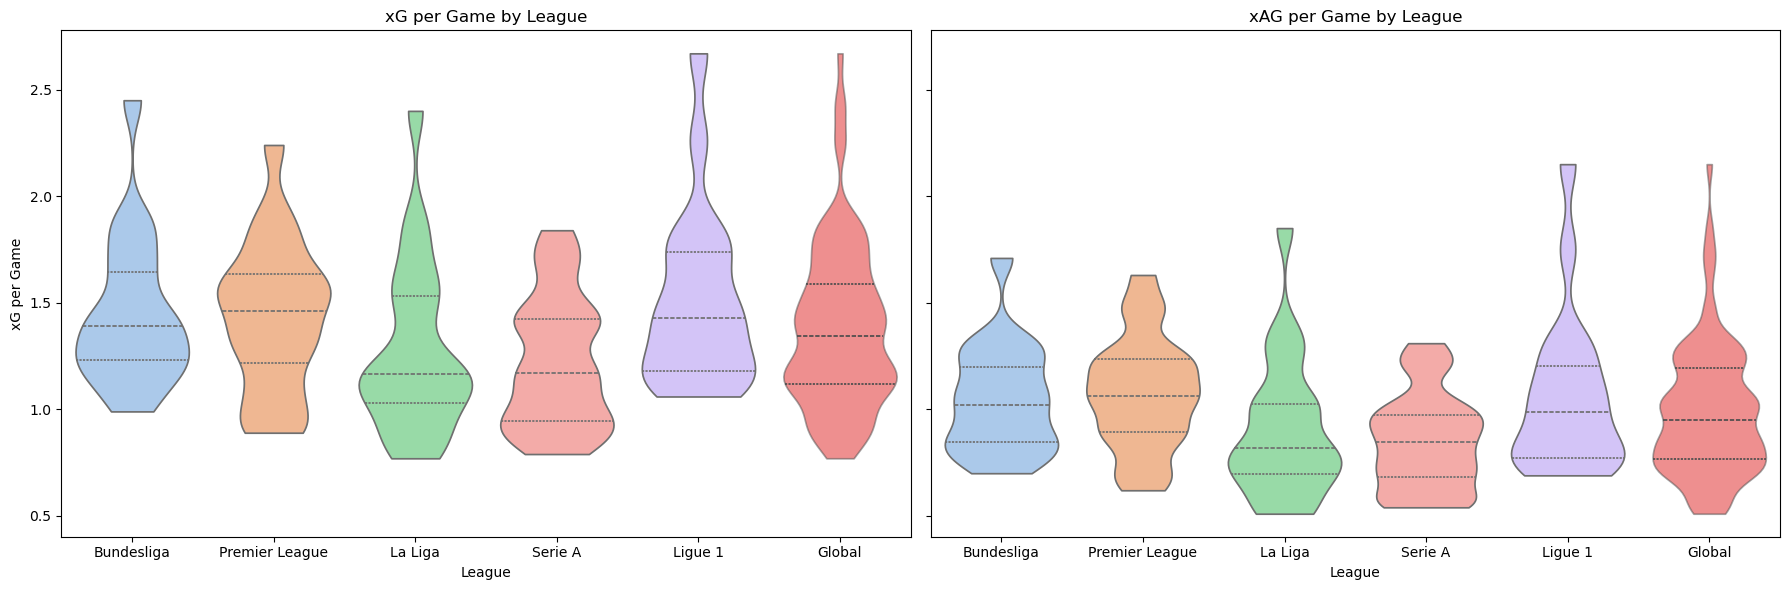

In [48]:
global_mean_xG = attacking_data['xG.1'].mean()
global_mean_xAG = attacking_data['xAG.1'].mean()

global_data = attacking_data.copy()
global_data['League'] = 'Global' 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.violinplot(
    data=attacking_data, x='League', y='xG.1', hue='League',
    palette='pastel', inner='quartile', legend=False, 
    bw_adjust=0.5, cut=0, ax=ax1
)

sns.violinplot(
    data=global_data, x='League', y='xG.1', color='red',
    inner='quartile', legend=False, bw_adjust=0.5, cut=0, ax=ax1,
    alpha=0.5
)
ax1.set_title('xG per Game by League')
ax1.set_ylabel('xG per Game')

sns.violinplot(
    data=attacking_data, x='League', y='xAG.1', hue='League', 
    palette='pastel', inner='quartile', legend=False, 
    bw_adjust=0.5, cut=0, ax=ax2
)

sns.violinplot(
    data=global_data, x='League', y='xAG.1', color='red',
    inner='quartile', legend=False, bw_adjust=0.5, cut=0, ax=ax2,
    alpha=0.5
)
ax2.set_title('xAG per Game by League')
ax2.set_ylabel('xAG per Game')

plt.tight_layout()
plt.show()

### Analysis

The first violin plot, which is comparing distributions of average xG per game between leagues, shows that there are multiple leagues that either above or below the average distribution based on our "global" data. For example, we can see that leagues like Serie A and LaLiga have a median less than the global. However, leagues like the Premier League, Ligue 1, and the Bundesliga seem to have a median slightly higher than the global. In terms of spread, we can see that the Serie A has an abnormally small range of xG values compared to the other leagues and the global distribution. This suggests that this is the league where teams are the closest together in terms of chance creation. All of the other leagues seem to have a similar size range across their teams. Additionally, the Serie A also stands out as it is the only league without a thin point of the top of the violin, which shows they have no clear "oustanding" team(s) creating the most xG per game. We can also see that the Ligue 1 violin plot has the largest minimum, in addition to the largest maximum xG values for a team.

The second violin plot, which is comparing distributions of average xAG per game between leagues, shows many similar features than that of the first plot. To start, the shape of all of the violins are very similar to the shapes from the first plot, which makes sense as xAG represents a subset of a teams xG that is assisted by a pass of some kind. This also explains why each of the violins are ranging from lower values. Looking at the medians for each violin, we again see a similar pattern to the first, where the Serie A and LaLiga seem to be below the global median, and the Premier League, Bundesliga, and Ligue 1 seem to be slightly above. 

From all of this information, we can conclude that leagues like the Premier League, Bundesliga, and Ligue 1 create higher quality and/or qunatity of chances per game based on median, quartile, and maximum and minimum points on the violin plots. We can also conclude that the Serie A seems to create the least amount/least quality chances per game on averages based on its violin plot for these two statistics.

## Part 2: Build Up Play

### Comparison: Use of Different Pass Types

For the second statistical comparison, I will be analyzing the differences in build up play between leagues through the use of different pass types. In modern soccer, passing is a fundamental metric for evaluating team style, possession efficiency, and tactical approach. Different pass types reflect varying strategies, from patient build-up play to direct attacking play. This analysis will examine the average distribution of these pass types across the leagues to identify trends and league-specific tendencies. This comparison will answer this research question:

- How does style of build up play compare between the top 5 leagues?


I will answer this question by analyzing data about three different passing types (short, medium, long) and seeing how the league averages per game compare to the global average, which again, is the average of all of these 5 leagues combined. To define what "short", "medium", and "long" means in this case, we are a range of distances to classify each pass. In this case:

- a "short" pass: between 5 - 15 yards
- a "medium" pass: between 15 - 30 yards
- a "long" pass: more than 30 yards

These definitions are provided with the dataset on fbref.com

In terms of how this data will be analyzed, I will use a grouped bar chart. Each group will represent a league, and each group will contain a bar for short, medium, and long passes.

In [56]:
pl_passing = pd.read_csv('PremierLeaguePassing.csv')
laliga_passing = pd.read_csv('LaLigaPassing.csv')
bundesliga_passing = pd.read_csv('BundesligaPassing.csv')
ligue1_passing = pd.read_csv('Ligue1Passing.csv')
seriea_passing = pd.read_csv('SerieAPassing.csv')

dataframes2 = [
    bundesliga_passing.assign(League="Bundesliga"),
    pl_passing.assign(League="Premier League"),
    laliga_passing.assign(League="La Liga"),
    seriea_passing.assign(League="Serie A"),
    ligue1_passing.assign(League="Ligue 1")
]
passing_data = pd.concat(dataframes2)

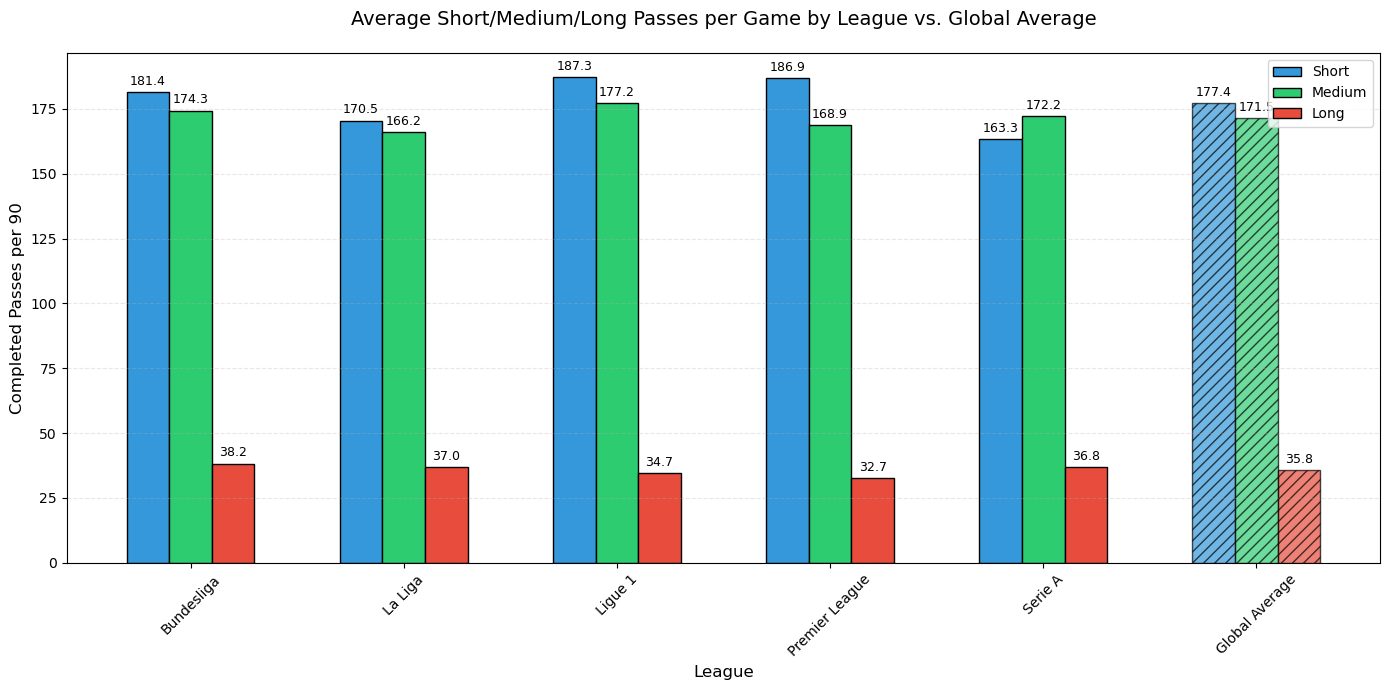

In [57]:
league_passes = passing_data.groupby('League').agg({'Cmp.1': 'sum',  'Cmp.2': 'sum','Cmp.3': 'sum', '90s': 'sum'}).reset_index()

league_passes['Short_p90'] = league_passes['Cmp.1'] / league_passes['90s']
league_passes['Medium_p90'] = league_passes['Cmp.2'] / league_passes['90s']
league_passes['Long_p90'] = league_passes['Cmp.3'] / league_passes['90s']

global_passes = passing_data.agg({'Cmp.1': 'sum', 'Cmp.2': 'sum', 'Cmp.3': 'sum', '90s': 'sum'})
global_short = global_passes['Cmp.1'] / global_passes['90s']
global_medium = global_passes['Cmp.2'] / global_passes['90s']
global_long = global_passes['Cmp.3'] / global_passes['90s']

global_row = pd.DataFrame({'League': ['Global Average'], 'Short_p90': [global_short], 'Medium_p90': [global_medium],
                           'Long_p90': [global_long]})
combined_data = pd.concat([league_passes, global_row], ignore_index=True)

plt.figure(figsize=(14, 7))
bar_width = 0.2
r = np.arange(len(combined_data))
colors = ['#3498db', '#2ecc71', '#e74c3c']
pass_types = ['Short_p90', 'Medium_p90', 'Long_p90']

for i, pass_type in enumerate(pass_types):
    bars = plt.bar(
        r + (i - 1) * bar_width, 
        combined_data[pass_type],
        width=bar_width,
        color=colors[i],
        edgecolor='black',
        label=pass_type.split('_')[0]
    )
    for j, bar in enumerate(bars):
        if combined_data.loc[j, 'League'] == 'Global Average':
            bar.set_hatch('///')
            bar.set_alpha(0.7)    
    for bar in bars:
        height = bar.get_height()
        plt.annotate(
            f'{height:.1f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xlabel('League', fontsize=12)
plt.ylabel('Completed Passes per 90', fontsize=12)
plt.title('Average Short/Medium/Long Passes per Game by League vs. Global Average', fontsize=14, pad=20)
plt.xticks(r, combined_data['League'], rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis

Looking at all of the groups, we can see that there is a common pattern. However, there is one outlier to this trend. We can see that for the majority of the leagues, including the global average, the short pass bar has the highest value, then the medium close after, and finally the long pass which is much less then the other two values. The Serie A, on the other hand, is the only league that averages more medium range passes than short.

Compared to the global average, the Bundesliga, Premier League, and Ligue 1 all complete more short passes per game, while the Serie A and LaLiga are both less. Looking at medium passes, all of the leagues are somewhat close to the global average, with the exception of maybe LaLiga, which has a slightly lower average. For long passes, the Premier League is the only league standing out for being significantly less than the global average, while the Bundesliga seems to be the only league with a significantly larger long pass per game average than the global.

Based on these findings, we can conclude that the Premier League, and Ligue 1 are more focused on short, intricate build up play, while LaLiga seems to be more focused on direct play. For the Bundesliga, the passing statistics may suggest a faster paced game, as all of their values are greater than the global average. For the Serie A, the data may suggest that more progressive, direct build up play is preferred because of the large value of medium and long ranged passes.

## Part 3: Efficiency

For the final statistical comparison, I will be analyzing efficiency by comparing average goal conversion rates between these leagues. While Expected Goals (xG) measures chance creation, the ability to convert those opportunities separates elite teams from the rest. By comparing actual goals scored to xG, we can quantify efficiency, identifying sides that consistently outperform, which suggests great finishing, or underperform, which may suggest wastefulness or a lack of quality. This analysis evaluates the goal-xG disparity across Europe’s top five leagues, revealing which leagues excel in goal efficiency and which struggle to translate chances and possession into results. With this comparison, I will answer the following research question:

- How do efficiency and conversion rates in attacking play compare across the top five leagues?

I will answer this question by comparing leagues average Goals - xG per game between each other in addition to again comparing to the global average. In this case, a positive value will imply that a team is "efficient" as they are outperforming their Expected Goals, and a negative value implies a team is not very efficient as they are underperforming their Expected Goals. I will visualize this comparison using a diverging bar chart, where the bars going to the left and in red are underperforming, and the bars going to the right and in green are overperforming.

### Comparison: Goals Scored vs xG (per game)

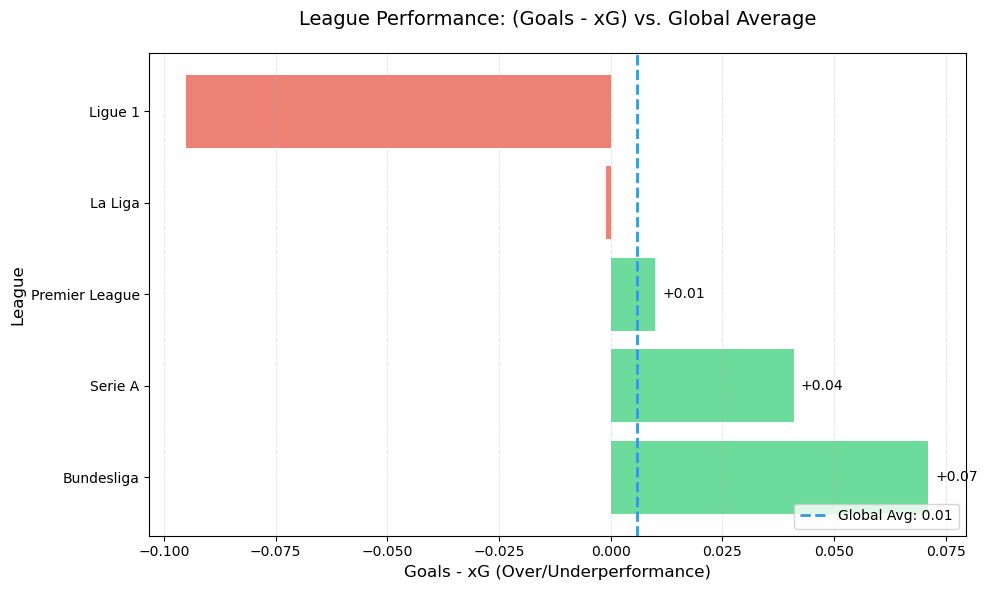

In [64]:
league_avgs = attacking_data.groupby('League').agg({'xG.1': 'mean', 'Gls.1': 'mean'}).reset_index()
global_avgs = attacking_data[['xG.1', 'Gls.1']].mean()

league_avgs['Gls_minus_xG'] = league_avgs['Gls.1'] - league_avgs['xG.1']
global_diff = global_avgs['Gls.1'] - global_avgs['xG.1']

league_avgs = league_avgs.sort_values('Gls_minus_xG', ascending=False)

plt.figure(figsize=(10, 6))

colors = np.where(league_avgs['Gls_minus_xG'] >= 0, '#2ecc71', '#e74c3c') 

bars = plt.barh(league_avgs['League'], league_avgs['Gls_minus_xG'], color=colors, alpha=0.7)

plt.axvline(global_diff, color='#3498db', linestyle='--', linewidth=2, 
            label=f'Global Avg: {global_diff:.2f}')

for bar in bars:
    width = bar.get_width()
    label_pos = width if width > 0 else width - 0.3 
    plt.annotate(
        f'{width:+.2f}',
        xy=(label_pos, bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        ha='left' if width > 0 else 'right',
        va='center',
        fontsize=10
    )

plt.xlabel('Goals - xG (Over/Underperformance)', fontsize=12)
plt.ylabel('League', fontsize=12)
plt.title('League Performance: (Goals - xG) vs. Global Average', fontsize=14, pad=20)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis

Looking at the different diverging bars, the immediate standout is Ligue 1, with an average underperformance per game of almost -0.1, which may suggest a lack of quality or wastefulness. LaLiga in this case seems like an "average" league as they are scoring around the same amount of goals as they are expecting per game. The same can be said with the Premier League, who only slightly outperformed their xG per game. On the other hand, both the Serie A and Bundesliga are outperforming their xG by a significant amount per game, which may suggest high quality goalscorers, and/or goals being scored from smaller chances.

Based on these findings, we could conclude that the Bundesliga is the most clinical/efficient as a whole compared to the other leagues in this comparison. We could also conclude that the Ligue 1 is the most wasteful/inefficient per game as a league.

## Conclusions

#### How does the average chance creation compare between the top 5 leagues?

The Premier League, Bundesliga, and Ligue 1 consistently generate higher-quality and/or higher-quantity chances per game, as evidenced by their above-global median xG and xAG values. These leagues exhibit greater variability in chance creation, with some teams significantly outperforming others.

Serie A stands out as the league with the most compact xG distribution, suggesting a competitive balance where teams create chances at a similar (but lower) level compared to other leagues. The absence of a standout xG leader further supports its reputation for defensive organization.

La Liga also trends below the global median in chance creation, which could potentially reflect a league-wide emphasis on structured build up rather than high-volume attacking.

#### How does style of build up play compare between the top 5 leagues?

Premier League and Ligue 1 prioritize short-passing buildup, aligning with their reputation for fast, intricate play. The Bundesliga’s higher numbers in all pass categories (short, medium, long) suggest a uniquely fast paced, transitional style.

Serie A’s preference for medium passes, the only league where they exceed short passes, indicates a progressive approachc favoring midfield control over quick combinations or direct play.

La Liga’s lower short-pass volume (compared to the global average) challenges stereotypes of tiki-taka dominance, hinting at a stylistic evolution toward more direct play.

The Bundesliga’s outlier long-pass rate and the Premier League’s unusually low long-pass reliance further highlight distinct league identities in transitioning play.

#### How do efficiency and conversion rates in attacking play compare across the top five leagues?

Bundesliga and Serie A are the most clinical leagues, outperforming their xG by the widest margins. This could reflect elite finishing (e.g., Bundesliga strikers excelling in high-quality chances) or tactical systems that convert lower-probability opportunities.

Ligue 1’s significant underperformance (-0.1 goals/xG gap) points to systemic wastefulness or goalkeeping excellence, while La Liga and the Premier League hover near expectations, suggesting balanced conversion rates.

### Key Takeaways


The numbers show each league has its own playing style when it comes to creating chances, passing, and finishing. Here is an interesting finding from each league:

 - Bundesliga teams are the most clinical on average

 - Ligue 1 teams are the most inefficient on average

 - Serie A is the most balanced league in terms of quality of teams

 - Premier League heavily favors short passes

 - La Liga is very less possession based then the other leagues

There's no clear "best" league, each league just utilizes different approaches and strategies.